**#1. Linear Regrission on california_housing_test data**

**Data File:** sample_data/california_housing_test.csv

In [2]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

print("Load Libraries Succeeded...")


Load Libraries Succeeded...


In [4]:
#Load Test DataSet
DataSet_CAHousingTest = pd.read_csv('sample_data/california_housing_test.csv')

print('Load Test DataSet Succeeded...')

Load Test DataSet Succeeded...


In [6]:
print('Quick Overview of DataSet_CAHousingTest...')
DataSet_CAHousingTest.head()

Quick Overview of DataSet_CAHousingTest...


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [8]:
#Overview of data set correlation

print('Overview of data set correlation')
DataSet_CAHousingTest.corr()


Overview of data set correlation


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


In [10]:
#Select Feature and Target
feature = DataSet_CAHousingTest['median_income']
target_var = DataSet_CAHousingTest['median_house_value']

print('Select Feature Dataset and Target Variable Succeeded...')



Select Feature Dataset and Target Variable Succeeded...


In [0]:
#Declare Line function
def myline(m,x,c):
  return m*x+c


In [0]:
#Declare Error function
def myerror(m,x,c,y):
  return np.mean( (myline(m,x,c)-y)**2)


In [0]:
#Declare Derivate Slop function
def derivate_slop(m,x,c,y):
  return 2*(np.mean(myline(m,x,c)-y)*x)
  
  

In [0]:
#Declare Derivate Intercept function
def derivate_intercept(m,x,c,y):
  return 2*(np.mean(myline(m,x,c)-y)*1)

In [0]:
#Declare Accuracy Predction function
def myaccuracy_predction(error,y):
  return 100 - ((error/np.mean(y**2))*100)


Cost = [113925557310.55113, 143163663530.42822, 154886478951.47168, 159314833116.05118, 160954795111.16284, 161557861152.4531, 161779062112.47876, 161860121725.0018, 161889816090.5269, 161900692596.494, 161904676280.81726, 161906135340.86356, 161906669731.3942, 161906865455.07132, 161906937139.96152, 161906963394.94547, 161906973010.97534, 161906976532.8985, 161906977822.82153, 161906978295.26315, 161906978468.29758, 161906978531.67188, 161906978554.88397, 161906978563.38446, 161906978566.4988, 161906978567.63882, 161906978568.05643, 161906978568.20984, 161906978568.26587, 161906978568.2867, 161906978568.29364, 161906978568.29617, 161906978568.29742, 161906978568.2977, 161906978568.29776, 161906978568.29782, 161906978568.29785]
Predection Accuracy:  -193.49856507453688 %
Iteration:  37


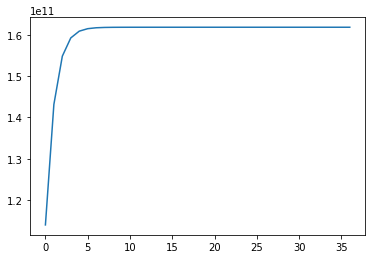

In [74]:
#Calculate Cost and Accuracy Percentage 

m = 5
c = 3
iteration_limit = 500
learning_rate = 0.01
cost = []
cost_current = 0
accuracy_percent_curr = 0
accuracy_percent = []
#print( myerror(m,feature,c,target_var))
for i in range(0, iteration_limit):
  m = learning_rate * derivate_slop(m,feature,c,target_var)
  c = learning_rate * derivate_intercept(m,feature,c,target_var)
  cost_current = myerror(m,feature,c,target_var)
  accuracy_percent_curr = myaccuracy_predction(myerror(m,feature,c,target_var), target_var)
  if i > 1:
    if (accuracy_percent_curr < 0 and cost[-1] >= cost_current ) or \
       (accuracy_percent_curr > 0 and cost[-1] <= cost_current) or \
       (accuracy_percent_curr == accuracy_percent[-1]) :
      break
      
  cost.append(cost_current)
  accuracy_percent.append(accuracy_percent_curr)
print('Cost =', cost)
print('Predection Accuracy: ', accuracy_percent_curr,'%')
print('Iteration: ', i)
plt.plot(cost)
plt.show()